In [1]:
import numpy as np
import pandas as pd
data0 = pd.read_csv('26feature.csv', index_col = None)
data0.head(2)

,sigle-atom,MagpieData minimum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData maximum CovalentRadius,...,packing fraction,sine coulomb matrix eig 0,sine coulomb matrix eig 3,sine coulomb matrix eig 5,sine coulomb matrix eig 6,sine coulomb matrix eig 8,sine coulomb matrix eig 11,SOAP_40,magmom,theoretical
0,3.736,55,33,77.0,862.573333,632.284444,8,13.333333,3.555556,132,...,0.073556,1491.101695,1202.240174,395.637373,380.398375,344.328015,361.301567,0.0,15.253,4
1,3.057,49,46,77.0,833.533333,897.644444,11,13.000000,4.666667,139,...,0.082227,2643.665053,966.679995,66.533883,0.000000,0.000000,0.000000,0.0,5.822,3


In [2]:
data_corresponding = data0.corr()['magmom'].abs().sort_values(ascending=False)[:10]
data_corresponding

magmom                               1.000000
theoretical                          0.884006
sigle-atom                           0.880524
SOAP_40                              0.559469
MagpieData maximum CovalentRadius    0.404913
vpa                                  0.328050
MagpieData mode NdUnfilled           0.283217
MagpieData range MendeleevNumber     0.264194
packing fraction                     0.256852
MagpieData mean SpaceGroupNumber     0.227818
Name: magmom, dtype: float64

<AxesSubplot:>

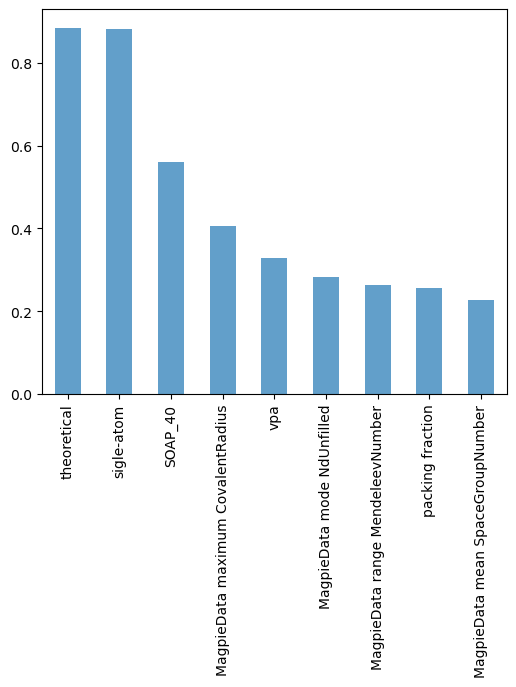

In [3]:
data_corresponding.drop('magmom').plot(kind = 'bar', rot = 90, alpha=0.7, figsize = (6,5))

In [4]:
y = data0['magmom'].values
excluded = ['magmom', 'theoretical']
X = data0.drop(excluded,axis=1)

print("There are %s possible dedscriptor:\n"%X.shape[1])
print('%s'%X.columns.values)

There are 25 possible dedscriptor:

['sigle-atom' 'MagpieData minimum MendeleevNumber'
 'MagpieData range MendeleevNumber' 'MagpieData mean MendeleevNumber'
 'MagpieData mean MeltingT' 'MagpieData avg_dev MeltingT'
 'MagpieData range Column' 'MagpieData mean Column'
 'MagpieData avg_dev Column' 'MagpieData maximum CovalentRadius'
 'MagpieData mode NdUnfilled' 'MagpieData range NUnfilled'
 'MagpieData mean NUnfilled' 'MagpieData avg_dev NUnfilled'
 'MagpieData mode GSmagmom' 'MagpieData mean SpaceGroupNumber' 'vpa'
 'packing fraction' 'sine coulomb matrix eig 0'
 'sine coulomb matrix eig 3' 'sine coulomb matrix eig 5'
 'sine coulomb matrix eig 6' 'sine coulomb matrix eig 8'
 'sine coulomb matrix eig 11' 'SOAP_40']


In [5]:
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.model_selection import StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
crossvalidation = KFold(n_splits = 10, shuffle = True, random_state = 8)

In [6]:
#import warnings
#warnings.filterwarnings("ignore")

#param_grid = {'n_estimators': [20, 50, 80, 100],
#              'max_features': ['sqrt'],
#              'min_samples_split': range(1, 5),
#              'min_samples_leaf': range(1, 5)}
##kfold = StratifiedKFold(n_splits = 10, shuffle=True,
##                        random_state = 12) ### 回归算法交叉验证不需要分层
#model_kf = GridSearchCV(RandomForestRegressor(random_state = 87),
#                     param_grid, cv = crossvalidation, return_train_score=False)

#model_kf.fit(X_train, y_train)

In [8]:
#df_hyper_kf = pd.DataFrame(model_kf.cv_results_)

In [7]:
#df_hyper_kf
##pd.set_option('display.max_rows', 6)
#df_hyper_kf[['params', 'mean_test_score']]

In [9]:
#model_kf.best_score_

In [10]:
#model_kf.best_params_

In [11]:
model_RFR = RandomForestRegressor(random_state=55, max_features= 'sqrt',
                                  min_samples_leaf= 1, min_samples_split= 3, 
                                  n_estimators= 50)
r2_scores_RFR = cross_val_score(model_RFR, X_train, y_train, scoring = 'r2',
                                cv = crossvalidation)
rmse_scores_RFR = cross_val_score(model_RFR, X_train, y_train, scoring = 'neg_root_mean_squared_error',
                                  cv = crossvalidation)
MAE_scores_RFR = cross_val_score(model_RFR, X_train, y_train, scoring='neg_mean_absolute_error',
                                 cv = crossvalidation)

print()
print('RFR train magmom Cross-validation results:')
print('Folds: %i, mean R2: %3f' % (len(r2_scores_RFR), np.mean(r2_scores_RFR)))
print('Folds: %i, mean RMSE: %3f' % (len(rmse_scores_RFR), -np.mean(rmse_scores_RFR)))
print('Folds: %i, mean MAE: %3f' % (len(MAE_scores_RFR), -np.mean(MAE_scores_RFR)))
print()

RFR_test = model_RFR.fit(X_train, y_train)
y_RFR_predict = model_RFR.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2_scores_RFR_test = r2_score(y_test, y_RFR_predict)
rmse_scores_RFR_test = np.sqrt(mean_squared_error(y_test, y_RFR_predict))
mae_scores_RFR_test = mean_absolute_error(y_test, y_RFR_predict)

print()
print('RFR predict magmom results:')
print('mean R2: %3f' % (r2_scores_RFR_test))
print('mean RMSE: %3f' % (rmse_scores_RFR_test))
print('mean MAE: %3f' % (mae_scores_RFR_test))
print()


RFR train magmom Cross-validation results:
Folds: 10, mean R2: 0.922613
Folds: 10, mean RMSE: 0.780727
Folds: 10, mean MAE: 0.548581


RFR predict magmom results:
mean R2: 0.820898
mean RMSE: 1.326791
mean MAE: 0.700746



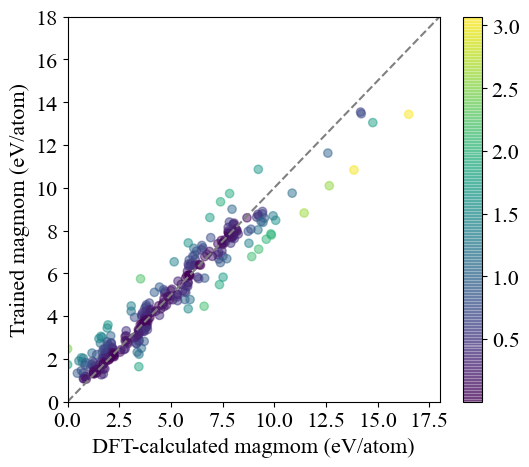

In [17]:
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['font.sans-serif']=['Times New Roman']

mpl.rcParams['lines.linestyle'] = '--'
plt.figure(figsize = (6,5))
s_x = np.linspace(0, 18, 100)
s_y = s_x
plt.scatter([ float(i) for i in y_train], cross_val_predict(model_RFR, X_train, y_train, cv = crossvalidation), alpha = 0.5,  
            c= abs([ float(i) for i in y_train]-cross_val_predict(model_RFR, X_train, y_train, cv = crossvalidation)))
plt.plot(s_x, s_y, color = 'grey')
#plt.legend(loc='upper left')
plt.xlabel('DFT-calculated magmom (eV/atom)', fontsize = 16)
plt.ylabel('Trained magmom (eV/atom)', fontsize = 16)
plt.xlim(0, 18)
plt.ylim(0, 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
#plt.colorbar()
plt.savefig('train1.png', dpi = 300)
#plt.show()

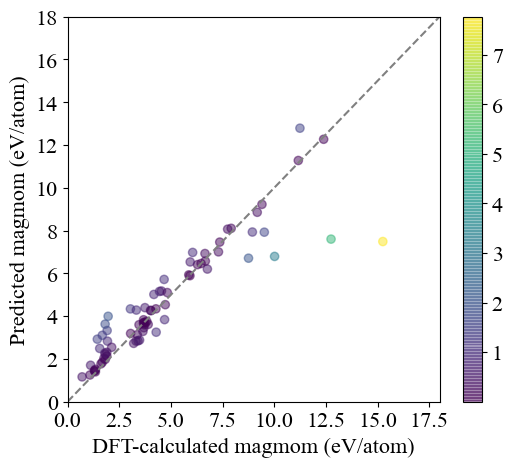

In [20]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['font.sans-serif']=['Times New Roman']

mpl.rcParams['lines.linestyle'] = '--'
plt.figure(figsize = (6,5))
s_x = np.linspace(0, 18, 100)
s_y = s_x
plt.scatter([ float(i) for i in y_test], [ float(i) for i in y_RFR_predict], alpha = 0.5,
           c= abs(np.array([ float(i) for i in y_test])-np.array([ float(i) for i in y_RFR_predict])))
plt.plot(s_x, s_y, color = 'grey')
#plt.legend(loc='upper left')
plt.xlabel('DFT-calculated magmom (eV/atom)', fontsize = 16)
plt.ylabel('Predicted magmom (eV/atom)', fontsize = 16)
plt.xlim(0, 18)
plt.ylim(0, 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=16)
#plt.colorbar()
plt.savefig('test1.png', dpi = 300)
#plt.show()

In [79]:
import shap
shap.initjs()

In [24]:
explainer = shap.Explainer(model_RFR)
shap_values = explainer.shap_values(X_test)
print(shap_values[1].shape)

(25,)


In [80]:
explainer = shap.Explainer(model_RFR, X_test)
shap_values = explainer(X_test)

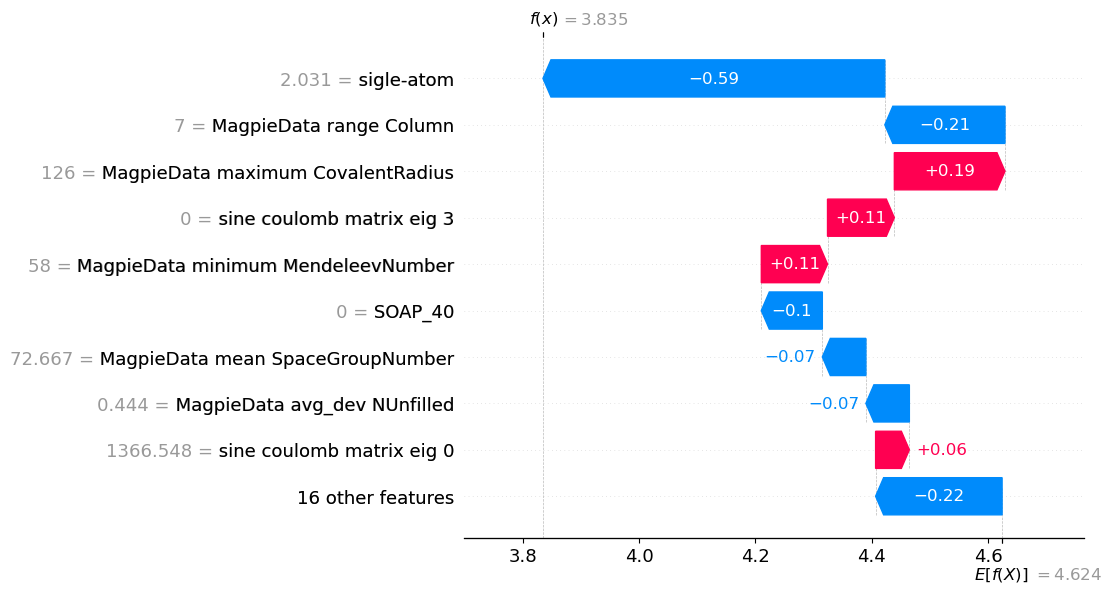

In [92]:
shap.plots.waterfall(shap_values[2])

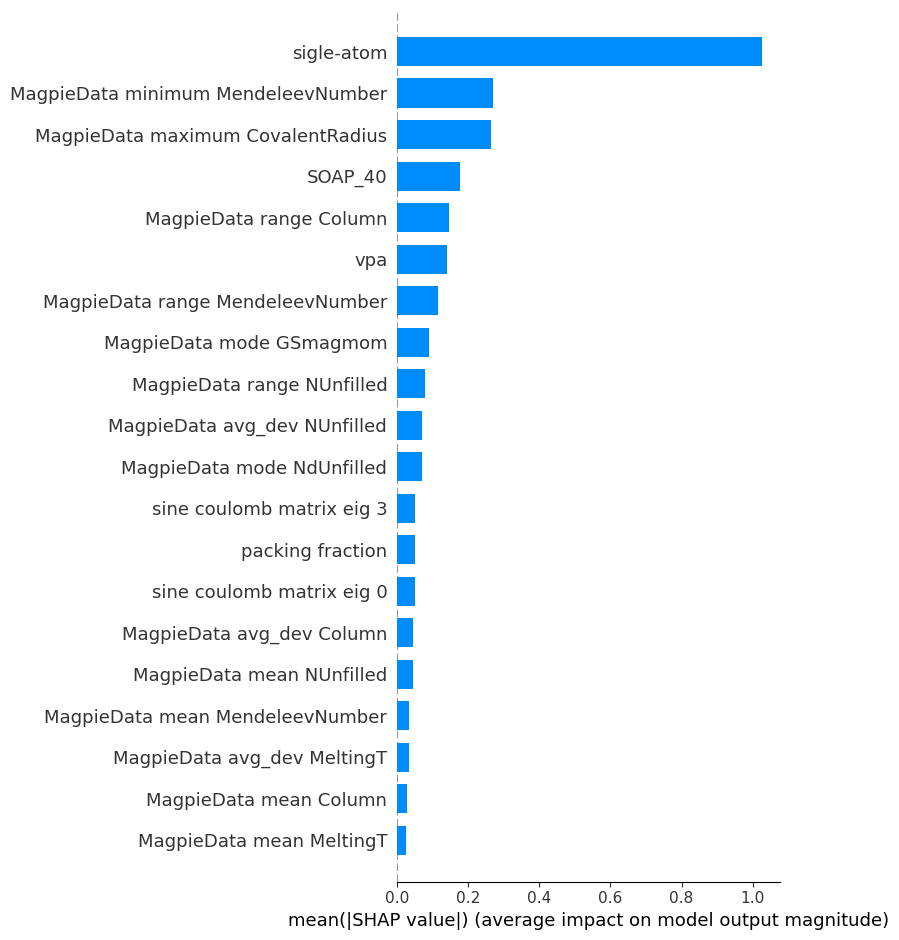

In [82]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

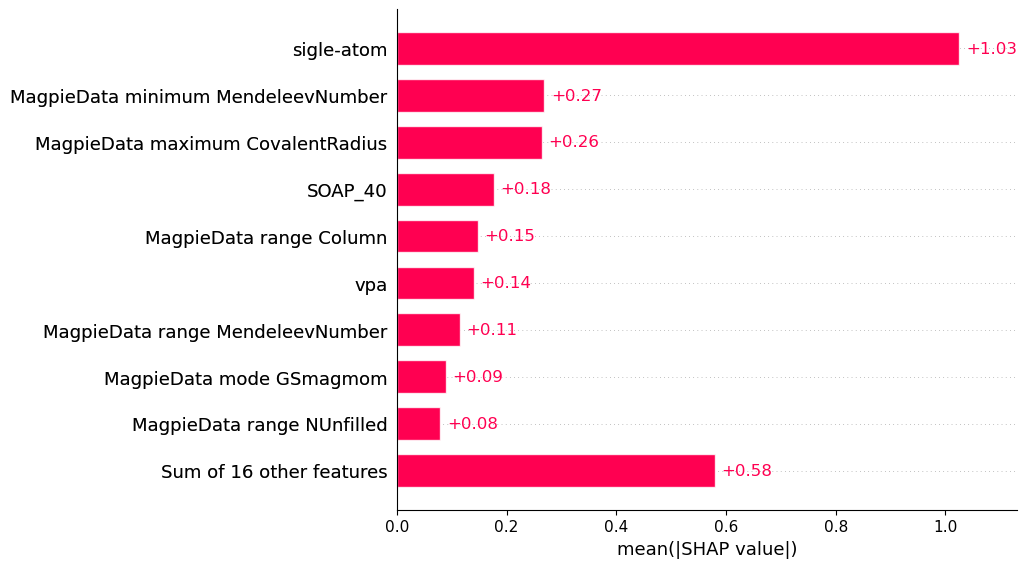

In [83]:
shap.plots.bar(explainer(X_test))

In [85]:
explainer.shap_values(X_test) 

array([[ 1.07505375e+00,  2.04847184e-01,  7.62486865e-02, ...,
        -1.04546307e-02, -3.37035344e-03, -8.21982371e-02],
       [ 1.97137098e+00,  4.91201921e-01,  2.28205425e-01, ...,
         1.01012843e-03,  5.11532736e-04, -4.27100701e-02],
       [-5.87857540e-01,  1.13861199e-01, -1.16476445e-02, ...,
        -2.29718511e-03, -1.78695891e-03, -1.04927398e-01],
       ...,
       [-7.25125915e-01, -1.53197023e-01,  5.86927403e-02, ...,
         7.01321740e-04, -3.74914492e-04, -1.22988964e-01],
       [ 1.31575509e+00,  3.75254493e-01,  6.84771176e-02, ...,
        -5.05435965e-03, -7.09913556e-04, -7.09138020e-02],
       [-4.47805911e-01, -6.65428478e-02, -8.35051892e-02, ...,
        -1.63979618e-03, -5.20735228e-03, -7.41703407e-02]])

In [86]:
shap.plots.force(shap_values[0])

In [87]:
shap.plots.force(shap_values)

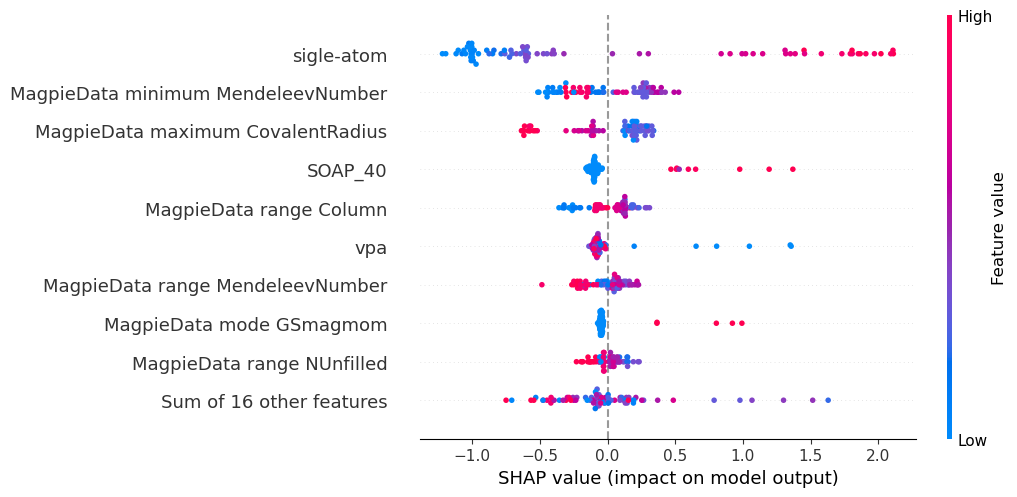

In [88]:
shap.plots.beeswarm(shap_values)

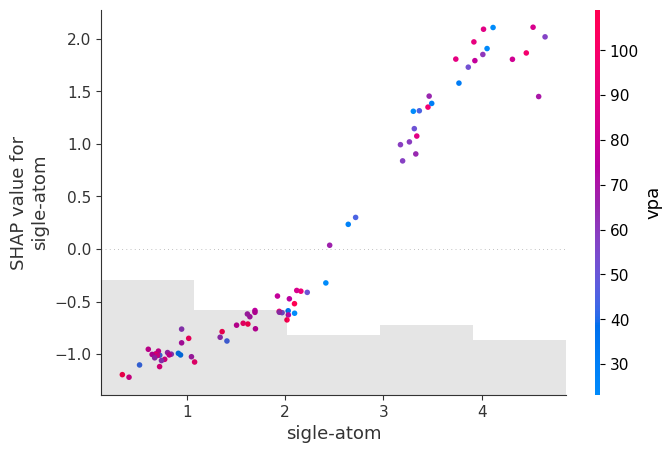

In [89]:
shap.plots.scatter(shap_values[:,"sigle-atom"], color=shap_values[:,"vpa"])

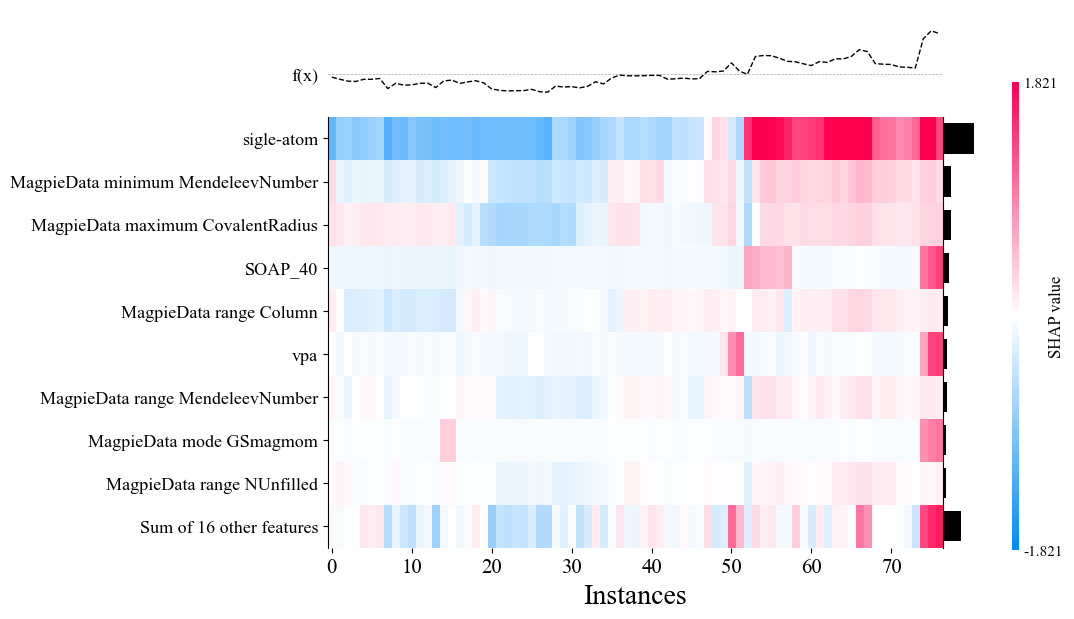

In [120]:
fig, ax = plt.subplots()
plt.rcParams['font.sans-serif'] = ['Times New Roman']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
#plt.figure(figsize = (10,5))
plt.xticks( fontproperties='Times New Roman', fontsize=15) #设置x坐标字体和大小
plt.yticks(fontproperties='Times New Roman', fontsize=20) #设置y坐标字体和大小
plt.xlabel('Meanoutput magnitude', fontproperties='Times New Roman',
           fontsize=20)#设置x轴标签和大小
#plt.ylabel('SHAP value', fontproperties='Times New Roman',
#           fontsize=20)
plt.tight_layout() #让坐标充分显示，如果没有这一行，坐标可能显示不全
shap.plots.heatmap(shap_values, show = False)
plt.savefig("shap2.jpg", dpi=600, bbox_inches='tight') #可以保存图片